In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

# Step 1: Load and preprocess the dataset
data = pd.read_csv("C:/Users/samue/Downloads/data_assessment_2/data_for_sentiment_analyzis/amazon_reviews.csv")

# Drop rows with missing values
data.dropna(subset=['cleaned_review'], inplace=True)

# Balance the distribution of labels
balanced_data = pd.DataFrame()
for sentiment in ['positive', 'neutral', 'negative']:
    subset = data[data['sentiments'] == sentiment]
    balanced_data = balanced_data.append(subset.sample(n=min(17340, len(subset)), random_state=42))

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(balanced_data, test_size=0.2, random_state=42)

# Step 2: Implement sentiment analysis models

# Version 1: Bag-of-Words (BoW) approach
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(train_data['cleaned_review'])
X_test_bow = vectorizer.transform(test_data['cleaned_review'])
y_train = train_data['sentiments']
y_test = test_data['sentiments']

# Version 2: Preprocessing with Lemmatization and BoW approach
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_text(text):
    tokens = word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_tokens]
    return ' '.join(lemmatized_tokens)

train_data['lemmatized_review'] = train_data['cleaned_review'].apply(lemmatize_text)
test_data['lemmatized_review'] = test_data['cleaned_review'].apply(lemmatize_text)

X_train_lem = vectorizer.fit_transform(train_data['lemmatized_review'])
X_test_lem = vectorizer.transform(test_data['lemmatized_review'])


C:\Users\samue\AppData\Local\Temp\ipykernel_10300\4072090447.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(subset.sample(n=min(17340, len(subset)), random_state=42))
C:\Users\samue\AppData\Local\Temp\ipykernel_10300\4072090447.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(subset.sample(n=min(17340, len(subset)), random_state=42))
C:\Users\samue\AppData\Local\Temp\ipykernel_10300\4072090447.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append(subset.sample(n=min(17340, len(subset)), random_state=42))


C:\Users\samue\.anaconda\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\samue\.anaconda\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Bag-of-Words (BoW) Approach:
Accuracy: 0.878316032295271
              precision    recall  f1-score   support

    negative       0.76      0.62      0.68       299
     neutral       0.83      0.87      0.85      1264
    positive       0.93      0.92      0.93      1905

    accuracy                           0.88      3468
   macro avg       0.84      0.80      0.82      3468
weighted avg       0.88      0.88      0.88      3468



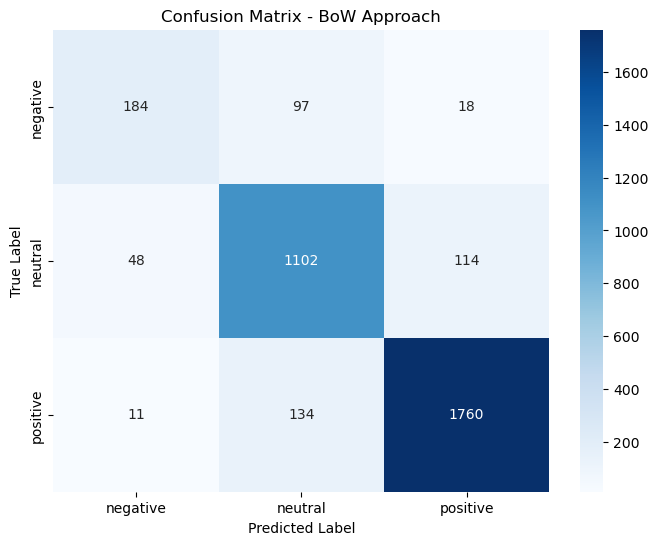

Lemmatization and Bag-of-Words (BoW) Approach:
Accuracy: 0.871683967704729
              precision    recall  f1-score   support

    negative       0.70      0.63      0.66       299
     neutral       0.83      0.86      0.84      1264
    positive       0.93      0.92      0.92      1905

    accuracy                           0.87      3468
   macro avg       0.82      0.80      0.81      3468
weighted avg       0.87      0.87      0.87      3468



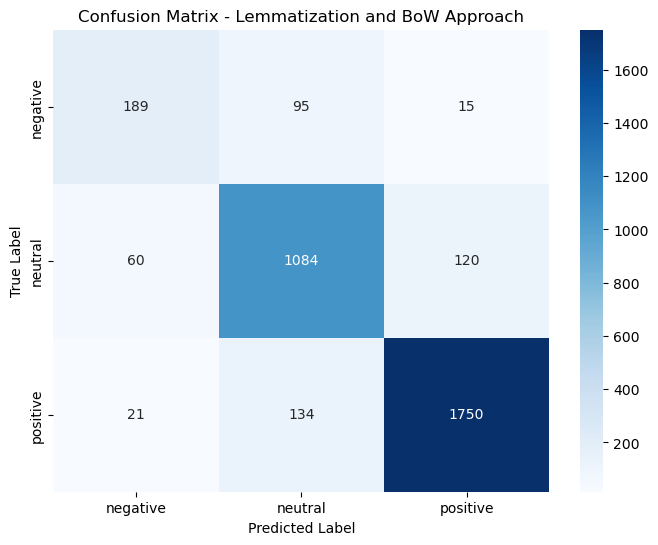

In [5]:
# Step 3: Train and evaluate the models

# Version 1: Bag-of-Words (BoW) approach
classifier_bow = LogisticRegression()
classifier_bow.fit(X_train_bow, y_train)
y_pred_bow = classifier_bow.predict(X_test_bow)

# Version 2: Preprocessing with Lemmatization and BoW approach
classifier_lem = LogisticRegression()
classifier_lem.fit(X_train_lem, y_train)
y_pred_lem = classifier_lem.predict(X_test_lem)

# Step 4: Compare the performance

# Version 1: Bag-of-Words (BoW) approach
print("Bag-of-Words (BoW) Approach - logistic regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))

# Confusion matrix for BoW approach
cm_bow = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - BoW Approach')
plt.show()

# Version 2: Preprocessing with Lemmatization and BoW approach
print("Lemmatization and Bag-of-Words (BoW) Approach:")
print("Accuracy:", accuracy_score(y_test, y_pred_lem))
print(classification_report(y_test, y_pred_lem))

# Confusion matrix for Lemmatization and BoW approach
cm_lem = confusion_matrix(y_test, y_pred_lem)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lem, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Lemmatization and BoW Approach')
plt.show()


Bag-of-Words (BoW) Approach - logistic regression:
Accuracy: 0.878316032295271
              precision    recall  f1-score   support

    negative       0.76      0.62      0.68       299
     neutral       0.83      0.87      0.85      1264
    positive       0.93      0.92      0.93      1905

    accuracy                           0.88      3468
   macro avg       0.84      0.80      0.82      3468
weighted avg       0.88      0.88      0.88      3468



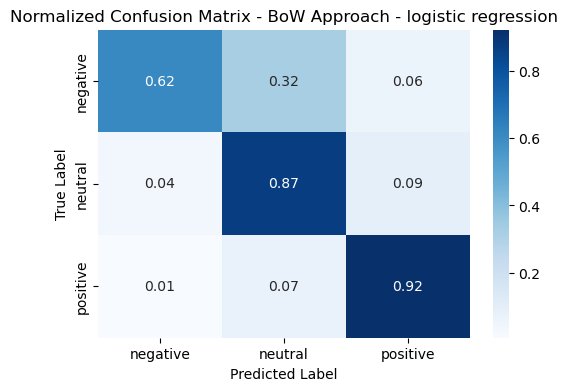

Lemmatization and Bag-of-Words (BoW) Approach - logistic regression:
Accuracy: 0.871683967704729
              precision    recall  f1-score   support

    negative       0.70      0.63      0.66       299
     neutral       0.83      0.86      0.84      1264
    positive       0.93      0.92      0.92      1905

    accuracy                           0.87      3468
   macro avg       0.82      0.80      0.81      3468
weighted avg       0.87      0.87      0.87      3468



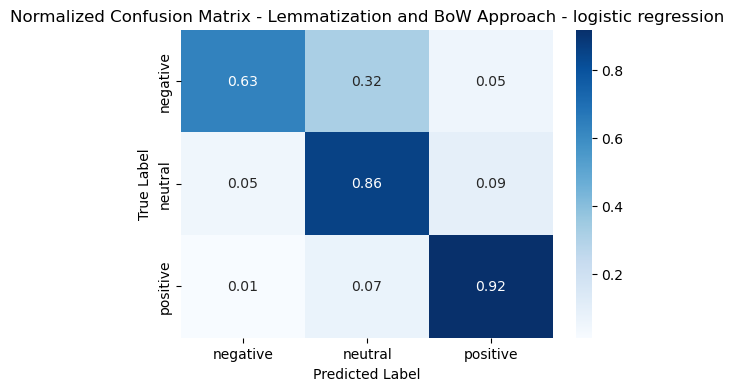

In [15]:
import numpy as np
# Version 1: Bag-of-Words (BoW) approach
print("Bag-of-Words (BoW) Approach - logistic regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))

# Confusion matrix for BoW approach
cm_bow = confusion_matrix(y_test, y_pred_bow)
cm_bow_normalized = cm_bow.astype('float') / cm_bow.sum(axis=1)[:, np.newaxis]  # Normalized confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_bow_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix - BoW Approach - logistic regression')
plt.show()


# Version 2: Preprocessing with Lemmatization and BoW approach
print("Lemmatization and Bag-of-Words (BoW) Approach - logistic regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lem))
print(classification_report(y_test, y_pred_lem))

# Confusion matrix for Lemmatization and BoW approach
cm_lem = confusion_matrix(y_test, y_pred_lem)
cm_lem_normalized = cm_lem.astype('float') / cm_lem.sum(axis=1)[:, np.newaxis]  # Normalized confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lem_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix - Lemmatization and BoW Approach - logistic regression')
plt.show()



In [16]:
#CREATING table and store the results of both classifiers with different approaches
import pandas as pd

# Define the results
results = [
    {
        'Model': 'Logistic Regression (BoW)',
        'Accuracy': 0.878316032295271,
        'Precision (negative)': 0.76,
        'Recall (negative)': 0.62,
        'F1-score (negative)': 0.68,
        'Support (negative)': 299,
        'Precision (neutral)': 0.83,
        'Recall (neutral)': 0.87,
        'F1-score (neutral)': 0.85,
        'Support (neutral)': 1264,
        'Precision (positive)': 0.93,
        'Recall (positive)': 0.92,
        'F1-score (positive)': 0.93,
        'Support (positive)': 1905
    },
    {
        'Model': 'Logistic Regression (BoW + Lemmatization)',
        'Accuracy': 0.871683967704729,
        'Precision (negative)': 0.70,
        'Recall (negative)': 0.63,
        'F1-score (negative)': 0.66,
        'Support (negative)': 299,
        'Precision (neutral)': 0.83,
        'Recall (neutral)': 0.86,
        'F1-score (neutral)': 0.84,
        'Support (neutral)': 1264,
        'Precision (positive)': 0.93,
        'Recall (positive)': 0.92,
        'F1-score (positive)': 0.92,
        'Support (positive)': 1905
    },
    {
        'Model': 'SVM (BoW)',
        'Accuracy': 0.8721645520953479,
        'Precision (negative)': 0.66,
        'Recall (negative)': 0.69,
        'F1-score (negative)': 0.67,
        'Support (negative)': 452,
        'Precision (neutral)': 0.83,
        'Recall (neutral)': 0.86,
        'F1-score (neutral)': 0.85,
        'Support (neutral)': 1906,
        'Precision (positive)': 0.94,
        'Recall (positive)': 0.91,
        'F1-score (positive)': 0.92,
        'Support (positive)': 2844
    },
    {
        'Model': 'SVM (BoW + Lemmatization)',
        'Accuracy': 0.8694732795078816,
        'Precision (negative)': 0.65,
        'Recall (negative)': 0.69,
        'F1-score (negative)': 0.67,
        'Support (negative)': 452,
        'Precision (neutral)': 0.83,
        'Recall (neutral)': 0.85,
        'F1-score (neutral)': 0.84,
        'Support (neutral)': 1906,
        'Precision (positive)': 0.94,
        'Recall (positive)': 0.91,
        'F1-score (positive)': 0.92,
        'Support (positive)': 2844
    }
]

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Set the Model column as the index
df.set_index('Model', inplace=True)

# Print the DataFrame
print(df)


                                           Accuracy  Precision (negative)  \
Model                                                                       
Logistic Regression (BoW)                  0.878316                  0.76   
Logistic Regression (BoW + Lemmatization)  0.871684                  0.70   
SVM (BoW)                                  0.872165                  0.66   
SVM (BoW + Lemmatization)                  0.869473                  0.65   

                                           Recall (negative)  \
Model                                                          
Logistic Regression (BoW)                               0.62   
Logistic Regression (BoW + Lemmatization)               0.63   
SVM (BoW)                                               0.69   
SVM (BoW + Lemmatization)                               0.69   

                                           F1-score (negative)  \
Model                                                            
Logistic Regression 

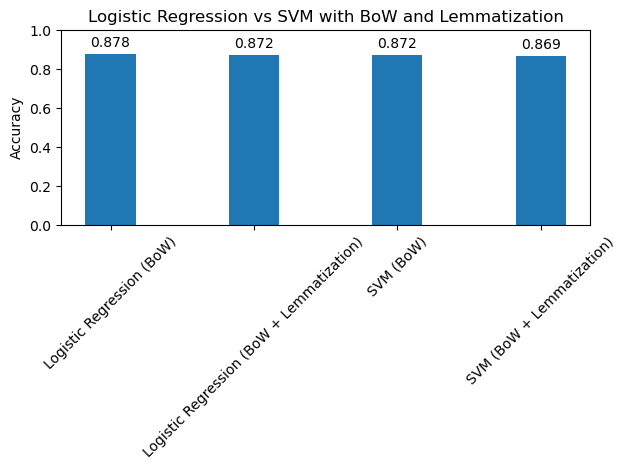

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy values
logistic_bow = 0.878316032295271
logistic_lemmatized = 0.871683967704729
svm_bow = 0.8721645520953479
svm_lemmatized = 0.8694732795078816

# Plotting the results
labels = ['Logistic Regression (BoW)', 'Logistic Regression (BoW + Lemmatization)', 'SVM (BoW)', 'SVM (BoW + Lemmatization)']
accuracy_values = [logistic_bow, logistic_lemmatized, svm_bow, svm_lemmatized]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x, accuracy_values, width)

ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression vs SVM with BoW and Lemmatization')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.set_ylim([0, 1])

# Adding the accuracy values as annotations on top of the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()
